In [414]:
import re
import networkx as nx
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt


Load dataframe

In [287]:
df = pd.read_csv('./dataset/H113.csv', encoding='UTF-8')
wiki_page_names = list(df.WikiPageName)
wiki_page_names = np.array([name.encode('UTF8') for name in wiki_page_names])

Makeshift solution because pandas is cancer sometimes

In [386]:
class Politician:
    def __init__(self, row):
        self.WikiPageName = u"%s" % (row.WikiPageName)
        self.Party = u"%s" % row.Party
        self.State = u"%s" % row.State
    def __hash__(self):
        return hash(self.WikiPageName)
    def __eq__(self, other):
        return (
                self.__class__ == other.__class__ and 
                self.WikiPageName == other.WikiPageName
               )

Read data into an array

In [395]:
def get_article_links(name, year):
    article_pattern = r'\[\[([^\]]*?)(?:\|.*?)*\]\]'
    path_folder = './congress2015/'
    article = io.open(path_folder + name + year + '.txt', 'r', encoding='utf-8').read()
    article_links = re.findall(article_pattern, article)
    article_links = [a.encode('UTF-8').replace(' ', '_') for a in article_links]
    return article_links

Doesnt work family

Using only names as nodes

In [401]:
DG = nx.DiGraph()

for i,name in enumerate(wiki_page_names):
    article_links = get_article_links(name, '2015')
    DG.add_node(name)
    for link in article_links:
        if link in wiki_page_names:
            DG.add_edge(name, link)

What is the number of nodes in the network? And the number of links?

In [402]:
print 'Nodes', len(DG.nodes())
print 'Links', len(DG.edges())

Nodes 444
Links 1606


Plot the in and out-degree distributions.

In [403]:
# Sorts by highest frequency of degree
def degree_sequence_sorted(graph):
    return sorted([d for n, d in graph.degree()], reverse=True)

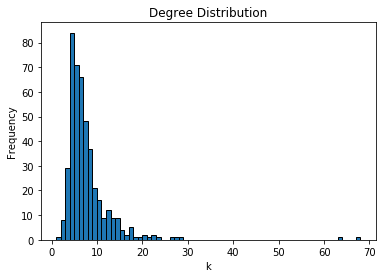

In [404]:
degrees = degree_sequence_sorted(DG)
v = range(min(degrees), max(degrees)+1)
plt.hist(degrees, bins=v, edgecolor="black")
plt.xlabel("k")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

In [405]:
most_connected = sorted([(d,n) for n, d in DG.degree()], reverse=True)

In [406]:
node = most_connected[0][1]

In [409]:
print 'Most Connected node:', node
print 'Outgoing:', len(DG.out_edges(node))
print 'Incoming:', len(DG.in_edges(node))


Most Connected node: Nancy_Pelosi
Outgoing: 11
Incoming: 57
